> - 原创： lebhoryi@rt-thread.com
> - 时间： 2020/06/30
> - 内容： tensorflow2 实现线性回归:，二元一次方程，摘抄自网上，练手

In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *

In [204]:
# prepare dataset
NUM_INPUT = 2
true_w, true_b, NUM_SAMPLES = [6., 2.], 20, 500
train_x = tf.random.normal(shape=(NUM_SAMPLES, NUM_INPUT),).numpy()

train_y = true_w[0] * train_x[:, 0] + true_w[1] * train_x[:, 1] + true_b
train_y = train_y + tf.random.normal(shape=train_y.shape, stddev=0.01)

print(train_x.shape)
print(train_y.shape)

(500, 2)
(500,)


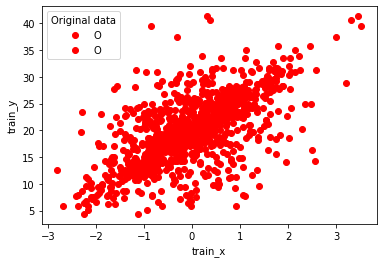

In [205]:
# show train data
# train_x, train_y = create_data(True)
plt.plot(train_x, train_y, 'ro', label='O')
plt.legend(loc='best', title='Original data')
plt.xlabel('train_x')
plt.ylabel('train_y')
plt.show()

In [206]:
# plt.scatter(train_x, train_y, c='r')
# plt.show()

> 仅供学习之用，不参与到训练

In [207]:
# read data
from tensorflow.data import Dataset

batch_size = 10

# 将训练数据和标签组合
dataset = Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.shuffle(50).batch(batch_size)
data_iter = iter(dataset)

In [216]:
# create model, 1
tf.keras.backend.clear_session()

model = models.Sequential()

model.add(layers.Dense(1, input_shape=(2,), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [209]:
from tensorflow import losses
from tensorflow.keras import optimizers

loss = losses.MeanSquaredError()
trainer = optimizers.SGD(learning_rate=0.03)
loss_history = []

在使用keras训练模型时，我们通过调用model实例的fit函数来迭代模型。fit函数只需传入你的输入x和输出y，还有epoch遍历数据的次数，每次更新梯度的大小batch_size, 这里定义epoch=3，batch_size=10。 使用keras甚至完全不需要去划分数据集

In [210]:
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    for (batch, (x, y)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            l = loss(model(x, training=True), y)
        
        loss_history.append(l.numpy().mean())
        grads = tape.gradient(l, model.trainable_variables)
        trainer.apply_gradients(zip(grads, model.trainable_variables))

    l = loss(model(train_x), train_y)
    print('epoch %d, loss: %f' % (epoch, l))

epoch 1, loss: 0.864520
epoch 2, loss: 0.001770
epoch 3, loss: 0.000101
epoch 4, loss: 0.000098
epoch 5, loss: 0.000098
epoch 6, loss: 0.000098
epoch 7, loss: 0.000098
epoch 8, loss: 0.000098
epoch 9, loss: 0.000098
epoch 10, loss: 0.000098


In [194]:
# 输出学到的weights
true_w, model.get_weights()[0]
model.get_weights()

[array([[5.9997845],
        [2.000696 ]], dtype=float32),
 array([15.300479], dtype=float32)]

In [195]:
# 输出学到的biase
true_b, model.get_weights()[1]

(15.3, array([15.300479], dtype=float32))

In [211]:
# loss_history

In [99]:
def loss_fn(model, x, y):
    y_ = model(x)
    return tf.reduce_mean(tf.square(y_ - y))

In [103]:
EPOCHS = 10
LEARNING_RATE = 0.1

for epoch in range(EPOCHS):  # 迭代次数
    with tf.GradientTape() as tape:  # 追踪梯度
        loss = loss_fn(model, train_x, train_y)  # 计算损失
    dW, db = tape.gradient(loss, [model.W, model.b])  # 计算梯度
    model.W.assign_sub(LEARNING_RATE * dW)  # 更新梯度
    model.b.assign_sub(LEARNING_RATE * db)
    # 输出计算过程
    print('Epoch [{}/{}], loss [{:.3f}], W/b [{:.3f}/{:.3f}]'.format(epoch, EPOCHS, loss,
                                                                     float(model.W.numpy()),
                                                                     float(model.b.numpy())))

Epoch [0/10], loss [27.169], W/b [1.857/13.431]
Epoch [1/10], loss [18.106], W/b [2.628/13.693]
Epoch [2/10], loss [12.077], W/b [3.256/13.912]
Epoch [3/10], loss [8.067], W/b [3.766/14.095]
Epoch [4/10], loss [5.398], W/b [4.181/14.248]
Epoch [5/10], loss [3.621], W/b [4.519/14.374]
Epoch [6/10], loss [2.439], W/b [4.794/14.480]
Epoch [7/10], loss [1.651], W/b [5.018/14.568]
Epoch [8/10], loss [1.126], W/b [5.200/14.640]
Epoch [9/10], loss [0.777], W/b [5.348/14.701]


In [201]:
# 保存模型结构及权重
model.save('keras_model.h5')
y = 6 * 2 + 2 * 2 + 15.3
print(y, model.predict([[2,2]]))

31.3 [[31.301441]]
